# Assignment 3

Under New York City's stop and frisk policy, millions of New Yorkers were stopped, questioned, and frisked by the police in a widespread effort to find drugs, weapons, and other illegal contraband. As we will discuss in class, this policy was found to be unconstitutional by a federal judge in 2013 (Floyd v. City of New York) on the grounds that it violated the Fourth Amendment (which prohibits unreasonable searches) and Fourteenth Amendment (which prohibits racial discrimination). Here, we use spatial data analysis techniques, applied to [stop and frisk data](https://5harad.com/data/sqf.RData), to examine some of the evidence which led to the ruling that the policy was racially discriminatory.

## Part 1

In this part, you will make a map of where the stops occur and the race of stopped pedestrians. You will make use of two data sources: the stop and frisk data, and a shapefile of New York City. 


**Processing stop and frisk data**. Read in the CSV *sqf.csv*, which contains the stop and frisk locations. Filter for stops with *suspected.crime* as "cpw" in NYC from 2011 to 2012: these are stops conducted because the police suspected the pedestrian was illegally carrying a weapon. When analyzing the race of the stopped pedestrian, treat both Black Hispanic and white Hispanic pedestrians as Hispanic, and in this assignment we will only consider four racial/ethnic groups (white, black, Hispanic and Asian). Turn the CSV into a geodataframe, with a geometry column, as described in lecture. The geometry column should be a point with the latitude and longitude of each stop. 

**Processing NYC shapefile**. Read in the New York shapefile (original data source: [census data](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-data.2012.html)) from 'ACS_2012_5YR_TRACT_36_NEW_YORK.gdb'. For this part of the assignmment, you will only need one layer of this shapefile, which you can read in by using

`gpd.read_file('ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='ACS_2012_5YR_TRACT_36_NEW_YORK')`

(See [here](https://geopandas.org/docs/user_guide/io.html) for more documentation about how to load only some data from a shapefile, which can be faster; you can also use the ["listlayers" function in the fiona package to check which layers exist in the shapefile](https://fiona.readthedocs.io/en/latest/manual.html#reading-multilayer-data). Later in the assignment, you will need to use other layers from the shapefile, and you can use these functions to   find the layers you need.)

You only need to select five NYC counties in NY shapefile, and their FIPS codes are 005 (Bronx County), 047 (Kings County), 061 (New York County), 081 (Queens County), and 085 (Richmond County).

**Plotting the data.** Randomly select 10,000 stops from the stop and frisk data. Then, using the geometry column and the shapefile of NYC, plot the stop locations as points on the NYC map. Color each stop by the race of the pedestrian stopped. When plotting the NYC map, set the column value as 'COUNTYFP' so it will give the whole county just one color. You may want to adjust the latitude and longtitude range in your plot if necessary. Make your map and dots partially transparent using the alpha argument, so it will be easier for you to observe some patterns. Write a couple sentences about what trends you see. (25 points)


In [310]:
# 0. import libraries for part 1, 2 and 3
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


# 1. load data csv into dataframe
dfSqf = pd.read_csv ('./A3_data/sqf.csv')

# A. sanity check: initial shape size 
dfSqf.head()

/Users/daan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,18,19,20,66,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,year,date,time,xcoord,ycoord,serial,radio.run,inside.outside,location.housing,observation.period,...,suspect.height,suspect.weight,suspect.hair,suspect.eye,suspect.build,found.gun,found.weapon,id,lat,lon
0,2006,NaN,NaN,1006611.0,233503.0,NaN,False,NaN,neither,NaN,...,5.583333,160.0,black,brown,medium,False,False,2,40.807559,-73.919226
1,2006,2006-01-01,14:10,981738.0,198272.0,1.0,False,True,transit,15.0,...,6.083333,155.0,black,brown,thin,False,False,3,40.710887,-74.009061
2,2006,2006-01-01,08:50,981349.0,198508.0,2.0,False,True,transit,5.0,...,5.666667,180.0,brown,brown,medium,False,False,4,40.711535,-74.010464
3,2006,2006-01-02,17:00,982103.0,198029.0,3.0,False,True,transit,2.0,...,5.583333,170.0,black,black,medium,False,False,5,40.710220,-74.007744
4,2006,2006-01-01,20:10,983359.0,203119.0,4.0,True,True,neither,5.0,...,5.666667,200.0,brown,brown,medium,False,False,6,40.724191,-74.003215


In [311]:
# 2. filter data to suspected crime equals to cpw & in 2011 and 2012
dfSqfCrime = dfSqf.loc[(dfSqf["suspected.crime"] == "cpw") & (dfSqf["year"] >= 2011) & (dfSqf["year"] <= 2012)]

# 3. drop nan

dfSqfCrime = dfSqfCrime.dropna(subset=["suspect.race"])


# 4. make new column IF 'hispanic' -> merging black hispanic and white hispanic

def repToHispanic(val):
    if 'hispanic' in val:
        return 'hispanic'
    else:
        return val
    
dfSqfCrime["suspect.race.replaced"] = dfSqfCrime["suspect.race"].apply(lambda x: repToHispanic(x))

# 5 drop rows IF NOT in list ["asian", "black", "hispanic", "white"]
dfSqfCrime = dfSqfCrime[dfSqfCrime['suspect.race.replaced'].isin([ "asian", "black", "hispanic", "white"])]

# B. sanity check: new shape size 
dfSqfCrime.head()

# 6. turn dataset into geo dataframe with geometry column long and lat
dfGeo = gpd.GeoDataFrame(dfSqfCrime, geometry=gpd.points_from_xy(dfSqfCrime.lon, dfSqfCrime.lat))

# C. sanity check: geodataframe
dfGeo.head()

,year,date,time,xcoord,ycoord,serial,radio.run,inside.outside,location.housing,observation.period,...,suspect.hair,suspect.eye,suspect.build,found.gun,found.weapon,id,lat,lon,suspect.race.replaced,geometry
2682507,2011,2011-01-01,00:07,1037668.0,153549.0,4.0,False,False,housing,1.0,...,black,brown,thin,False,False,2701345,40.587972,-73.807674,black,POINT (-73.80767 40.58797)
2682508,2011,2011-01-01,00:07,1037668.0,153549.0,3.0,False,False,housing,1.0,...,black,brown,thin,False,False,2701346,40.587972,-73.807674,black,POINT (-73.80767 40.58797)
2682509,2011,2011-01-01,00:07,1037668.0,153549.0,1.0,False,False,housing,1.0,...,black,brown,medium,False,False,2701347,40.587972,-73.807674,black,POINT (-73.80767 40.58797)
2682510,2011,2011-01-01,00:07,1037668.0,153549.0,2.0,False,False,housing,1.0,...,black,brown,thin,False,False,2701348,40.587972,-73.807674,black,POINT (-73.80767 40.58797)
2682511,2011,2011-01-01,00:10,1051507.0,160090.0,8.0,False,False,neither,1.0,...,black,brown,thin,False,False,2701349,40.605831,-73.757783,black,POINT (-73.75778 40.60583)


<AxesSubplot:>

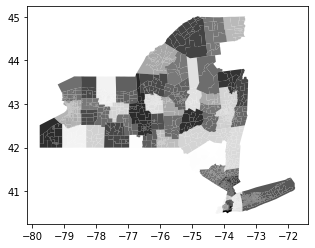

In [312]:
# 7. load shape file nyc
nycShapeFile = gpd.read_file('./A3_data/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='ACS_2012_5YR_TRACT_36_NEW_YORK')

# D. sanity check: plot shapefile
nycShapeFile.plot(cmap='Greys')

/Users/daan/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(2167, 17)

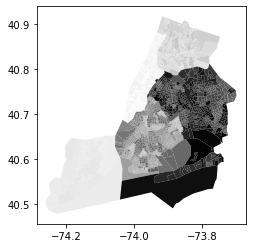

In [313]:
# 8. select 5 nyc counties in shapefile; 005, 047, 061, 081, 085 and add labesl

# map labels to county codes
countyCodes = { "005": "Bronx", "047": "Kings", "061": "New York County", "081": "Queens","085": "Richmond"}

# select every county from list
nycShapeFileSelected = nycShapeFile[nycShapeFile['COUNTYFP'].isin(countyCodes.keys())]

# add text labels to new column 
nycShapeFileSelected["COUNTYFP.LABEL"] = nycShapeFileSelected['COUNTYFP'].apply(lambda x: countyCodes[x])

# E. sanity check: plot shapefile with selects & check shape size
nycMap = nycShapeFileSelected.plot(cmap='Greys')
nycShapeFileSelected.shape

In [314]:
# 9. randomly select 10000 stops .sample(10000)
dfSqfCrimeSample = dfSqfCrime.sample(10000)

# F. sanity check: check size of dataframe
dfSqfCrimeSample.shape

(10000, 90)

<AxesSubplot:>

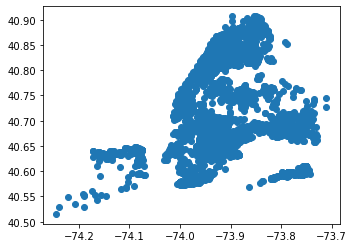

In [315]:
# 8. plot points on the NYC map.

# create a geopandas geodataframe from the pandas dataframe (source: lecture 4 slides)
gdfTree = gpd.GeoDataFrame(dfSqfCrimeSample)

# G. sanity check: plot map
gdfTree.plot()

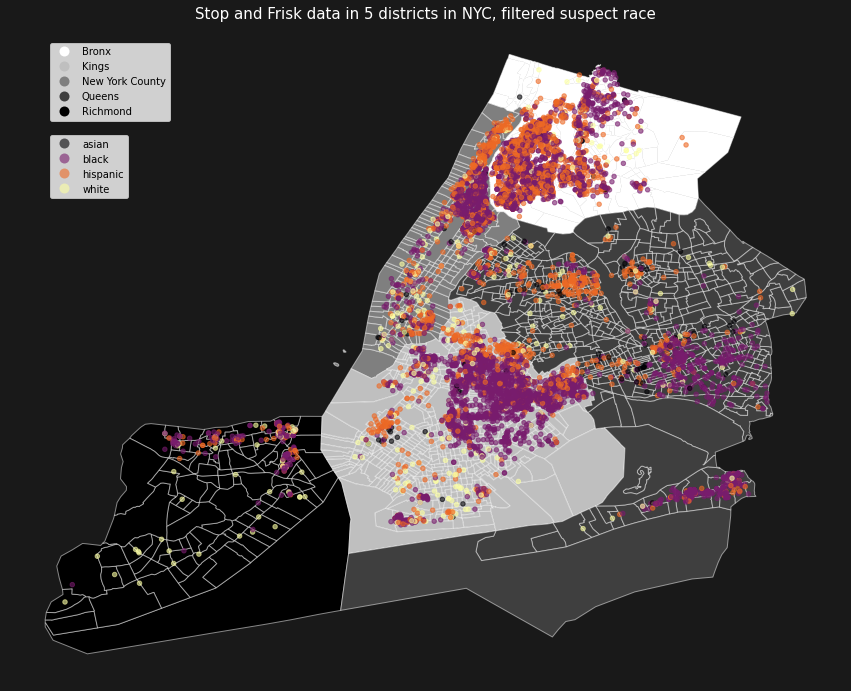

In [316]:
# 9. Set figure and axis for polotting data
fig, ax = plt.subplots(figsize=(15,15), facecolor='#191919')



# 9. set each column COUNTYFP also to unique color - all counties need to have same color -!!
ax = nycShapeFileSelected.plot(
    ax=ax, 
    cmap='binary', 
    column='COUNTYFP.LABEL', 
    edgecolor=(1, 1, 1, 0.5), 
    linewidth=1, 
    legend=True
)

# set position legend for counties
leg1 = ax.get_legend()
leg1.set_bbox_to_anchor((0, 0.78, 0.2, 0.2))

# 10. color each event by the race & 11. styling: make dots partially transparent w/ alpha 
gdfTree.plot(
    ax=ax, 
    cmap='inferno', 
    column='suspect.race.replaced', 
    alpha=0.6, 
    markersize=20, 
    legend=True,
    zorder=1 
)

# set position legend for people
leg2 = ax.get_legend()
leg2.set_bbox_to_anchor((0, 0.74, 0.15, 0.1))

# Plot: extra settings and values
_= ax.axis('off')
_= ax.set_title("Stop and Frisk data in 5 districts in NYC, filtered suspect race", fontsize=15, color='white')
_= ax.add_artist(leg1)


# 📝 Trends description

At first glance, the color indication shows that most persons being stopped and frisked are black and Hispanic. Moreover, these events occur with and higher density in Bronx County (005) and Kings County (047). Asian and white people are the least common being searched, and the districts are more evenly distributed. It also appears that the least people being frisked and searched are in Richmond Country. Looking at the size of the county about the number of events, Richmond Country has the lowest distribution and the Bronx the highest by just looking at the size. 

In Queens, there are high-density spots of black people being searched in one area where almost no other ethnicities are being stopped. The same goes for Brooklyn; this can also mean that the visualization is not showing all the underlying frisk and stops since the alpha value is one after three events around the exact location. To improve the alpha layers, a zoom level or interactivity by toggling ethnicities can be applied to the map. 

## Part 2
#### Use the layer 'X03_HISPANIC_OR_LATINO_ORIGIN' in Census data shapefile, make four maps: 

1) plotting the fraction of each block group which is white; 
2) plotting the fraction of each block group which is black; 
3) plotting the fraction of each block group which is Hispanic;
4) plotting the fraction of each block group which is Asian.

Use the color of each block group to show the race fractions. You do not need to use the stop and frisk data for this part. To find the meaning of each column, use the metadata file which is also included in the Census shapefile. You can read in the metadata file using 

`metadata=gpd.read_file('ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='TRACT_METADATA_2012')`

#### Look at the maps from part 1 and part 2 side by side and write a few sentences summarizing your conclusions. (25 points)


In [317]:
# 1. get data layer X03_HISPANIC_OR_LATINO_ORIGIN from shapefile

dataHispanicLatinoOrigin = gpd.read_file('A3_data/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='X03_HISPANIC_OR_LATINO_ORIGIN').set_index("GEOID")
metadata = gpd.read_file('A3_data/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='TRACT_METADATA_2012')

nameCodes = {
    "Total": "B03001e1",
    "Hispanic": "B03001e3",
    "White": "B03002e3",
    "Black": "B03002e4",
    "Asian": "B03002e6"
}

dataHispanicLatinoOrigin.head()

,B03001e1,B03001m1,B03001e2,B03001m2,B03001e3,B03001m3,B03001e4,B03001m4,B03001e5,B03001m5,...,B03002m20,B03002e21,B03002m21,B03003e1,B03003m1,B03003e2,B03003m2,B03003e3,B03003m3,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
14000US36001000100,2235,294,1868,291,367,202,175,148,144,136,...,12,0,12,2235,294,1868,291,367,202,None
14000US36001000200,5412,792,4896,764,516,239,0,17,335,144,...,17,0,17,5412,792,4896,764,516,239,None
14000US36001000300,6421,740,5479,707,942,541,11,15,829,545,...,111,54,53,6421,740,5479,707,942,541,None
14000US36001000401,2412,188,2358,197,54,52,27,44,27,29,...,44,0,12,2412,188,2358,197,54,52,None
14000US36001000403,4540,500,4469,521,71,73,0,12,0,12,...,12,0,12,4540,500,4469,521,71,73,None


In [318]:
# 2. convert titles +  calculate fraction

for key, col in nameCodes.items():
    nycShapeFileSelected[f"{key}-frac"] = nycShapeFileSelected["GEOID_Data"].apply(
        lambda geoid: dataHispanicLatinoOrigin.loc[geoid][col] / dataHispanicLatinoOrigin.loc[geoid][nameCodes["Total"]]
    )
nycShapeFileSelected.head()

/Users/daan/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Shape_Length,Shape_Area,GEOID_Data,geometry,COUNTYFP.LABEL,Total-frac,Hispanic-frac,White-frac,Black-frac,Asian-frac
106,36,061,008900,36061008900,89,Census Tract 89,G5020,S,165576.0,0.0,...,0.018210,0.000018,14000US36061008900,"MULTIPOLYGON (((-74.00596 40.74523, -74.00554 ...",New York County,1.0,0.147208,0.678453,0.069316,0.085069
107,36,061,011700,36061011700,117,Census Tract 117,G5020,S,193863.0,170206.0,...,0.033537,0.000039,14000US36061011700,"MULTIPOLYGON (((-74.00980 40.76267, -74.00952 ...",New York County,1.0,0.223086,0.549325,0.101515,0.106017
108,36,061,011600,36061011600,116,Census Tract 116,G5020,S,209702.0,108796.0,...,0.025816,0.000034,14000US36061011600,"MULTIPOLYGON (((-73.95969 40.76274, -73.95924 ...",New York County,1.0,0.057090,0.604315,0.086030,0.185478
109,36,061,017700,36061017700,177,Census Tract 177,G5020,S,174561.0,0.0,...,0.018541,0.000019,14000US36061017700,"MULTIPOLYGON (((-73.97269 40.79087, -73.97223 ...",New York County,1.0,0.274034,0.469422,0.173220,0.052467
110,36,061,013800,36061013800,138,Census Tract 138,G5020,S,182091.0,0.0,...,0.017973,0.000019,14000US36061013800,"MULTIPOLYGON (((-73.95729 40.77428, -73.95680 ...",New York County,1.0,0.066823,0.827914,0.022222,0.070955


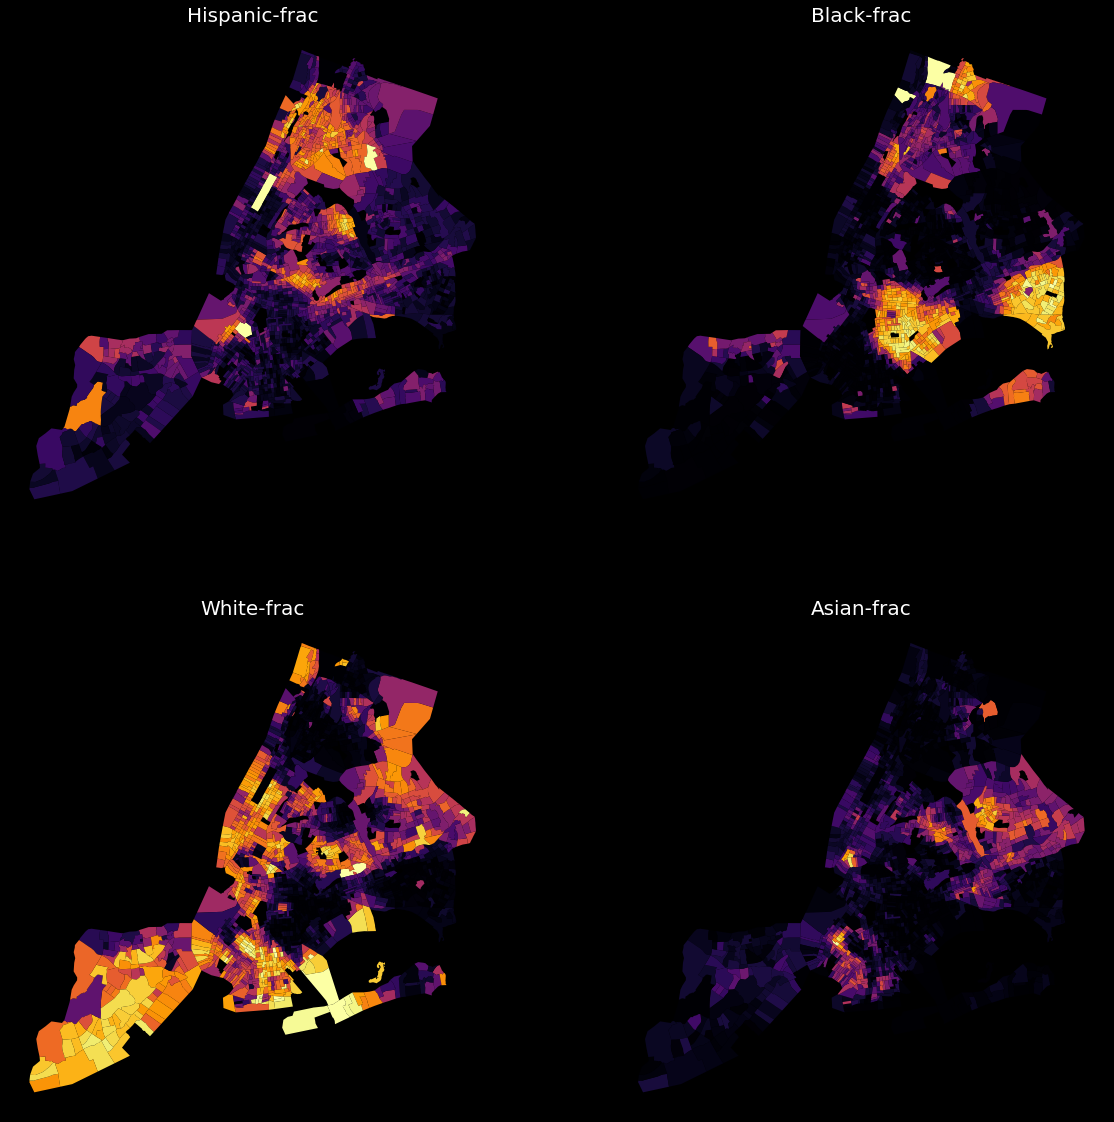

In [319]:
# Plot all four maps via loop 

# 3. plot into map w/ para 'white'
# 4. plot into map w/ para 'black'
# 5. plot into map w/ para 'hispanic'
# 6. plot into map w/ para 'asiasn'

fig, axs = plt.subplots(2, 2, figsize=(20,20), facecolor='#000000')

idx = 0
for key in nameCodes.keys():
    if key != "Total":
        row = idx % 2
        col = idx // 2
        ax = axs[row, col]
        col = f"{key}-frac"
        
        # Plot map and style
        nycShapeFileSelected.plot(
            ax=ax, 
            zorder=1, 
            column=col,
            cmap='inferno'
        )

        
        # Plot: extra settings and add title
        _= ax.axis('off')
        _= ax.set_title(col, fontsize=20, color='white')
        
        idx += 1


# 9. WRITEUP: conclusions few sentences summarizing conclusions comparing part 1 and 2

# 📝 Summarizing conclusions

If we look at both maps, we can see that in the areas where the population has a high fraction of white citizens; the stop and frisks rate is almost none. When we compare this to locations with a high black and Hispanic population, we see much more stop and frisks. Since we take a sample of 10000, this can suggest the sample is biased, but when generating the data again, all the results are comparable. Moreover, since we calculated fractions, all populations are relative to another. This inequality in data draws to the conclusion that the NYPD is more likely to discriminate based on ethnicity, especially towards black and Hispanic people. 


## Part 3
#### Merge [NYPD's population and precinct data](https://johnkeefe.net/nyc-police-precinct-and-census-data) (nyc_2010pop_2020precincts.csv and geo_export.shp) to create a new geodata. (Please refer to the "census codebook page" in the data folder for the meanings of different columns in the police precinct dataset.) 
#### Map each stop from the stop and frisk data from part 1 to a police precinct using a [spatial join](https://geopandas.org/gallery/spatial_joins.html) as discussed in class. And this time, please use the full data of "stop and frisk", rather than the 10,000 sample.
#### Make a plot where each point represents one police precinct with more than 100 residents, the x-axis is the proportion of the police precinct population which is white, and the y-axis is the number of stops per capita (ie, the number of stops in the precinct, of pedestrians of all races, divided by the population in the precinct). Add a regression line, using scipy.stats.linregress to show the trend in this plot. (20 points)

In [320]:
# 1. load datasets nyc_2010pop_2020precincts.csv and geo_export.shp
dfPrecincts = pd.read_csv("A3_data/nyc_2010pop_2020precincts.csv")
shapesPrecincts = gpd.read_file("A3_data/NYC_Police_Precincts_2020/geo_export.shp")

print(dfPrecincts.shape)
print(shapesPrecincts.shape)

(77, 145)
(77, 4)


In [321]:
# 2. transform to geodataframe and merge datasets
gdfPrecincts = gpd.GeoDataFrame(shapesPrecincts.merge(dfPrecincts, left_on='precinct', right_on='precinct_2020'))

print(gdfPrecincts.shape)

(77, 149)


In [322]:
# 3. remove entries nan
dfGeo = dfGeo[(dfGeo["lon"].notna()) & (dfGeo["lat"].notna())]
dfGeo.shape

# 4. set crs
gdfPrecincts.crs = 'EPSG:4326'
dfGeo.crs = 'EPSG:4326'

# 5. join data
gdfJoin = dfGeo.sjoin(gdfPrecincts, how='inner')
gdfJoin[gdfJoin.precinct == 1].shape[0]

429

In [323]:
# 6. select needed precincts > 100
neededPrecincts = gdfPrecincts[gdfPrecincts.P0010001 > 100].precinct_2020.unique()
len(neededPrecincts)

76

In [324]:
#7. get proportion white population
gdfPrecincts['white_prop'] = gdfPrecincts.P0010003 / gdfPrecincts.P0010001

gdfPrecincts.white_prop.head()

0    0.757120
1    0.255593
2    0.855382
3    0.211442
4    0.417579
Name: white_prop, dtype: float64

In [325]:
# 8. get number of stops per capita
gdfPrecincts[gdfPrecincts.precinct_2020 == 20]

# function for calc needed precints based on dynamic parameteres
def calcNeededPrecinct(groupObj, stopsObj, propTag):
    for neededPrecinct in neededPrecincts:

        # 8.1 append selection to obj
        precinctProp = gdfPrecincts[gdfPrecincts.precinct_2020 == neededPrecinct][propTag].values[0]
        groupObj.append(precinctProp)

        # 8.2 calc total stops
        totalStops = gdfJoin[gdfJoin.precinct_2020 == neededPrecinct].shape[0]

        # 8.3 calc population
        totalPopulation = gdfPrecincts[gdfPrecincts.precinct_2020 == neededPrecinct].P0010001

        # 8.4 calc per capita and set to obj
        perCapita = totalStops / totalPopulation
        stopsObj.append(perCapita.values[0])

white = []
stopsPerCapitaWhite = []


In [326]:
calcNeededPrecinct(white, stopsPerCapitaWhite, "white_prop")

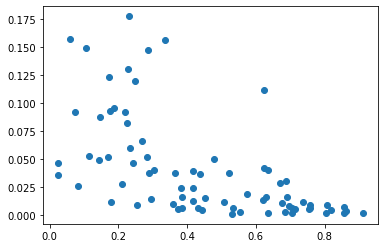

In [327]:
# 9. plot data to scatter

plt.scatter(white, stopsPerCapitaWhite)

In [328]:
# 10. import linregress from scipy
from scipy.stats import linregress

# 11. make function to plot linear regression to certain group
def plotLinearRegr(group, stopsObj, title):
    
    slope, intercept, r, p, se = linregress(group, stopsObj)
    
    axs = plt.gca()
    x_vals = np.array(axs.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='r')
    
    plt.scatter(group, stopsObj)
    

    plt.xlabel(f"Part {title} people in precinct")
    plt.ylabel("Stop and frisk per capita")

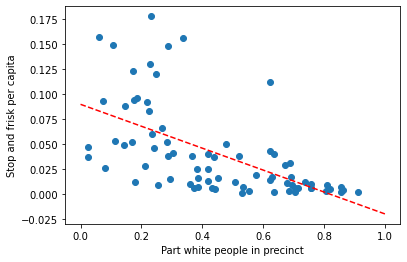

In [329]:
#12. proportion of the precinct population for white

plotLinearRegr(white, stopsPerCapitaWhite, "white")

#### Now make three more plots where you change the x-values to be the proportion of the precinct population which is Black, Hispanic, or Asian. Keep the same y-values. Add a regression line to each plot. Summarize the conclusions from all four plots. (20 points)

In [330]:
# 13. calculation proportion of prcinct population for other etnicities
gdfPrecincts['black_prop'] = gdfPrecincts.P0010004 / gdfPrecincts.P0010001
gdfPrecincts['asian_prop'] = gdfPrecincts.P0010006 / gdfPrecincts.P0010001
gdfPrecincts['hispanic_prop'] = gdfPrecincts.P0020002 / gdfPrecincts.P0010001
gdfPrecincts[['black_prop', 'asian_prop', 'hispanic_prop']].head()


,black_prop,asian_prop,hispanic_prop
0,0.032424,0.158506,0.070127
1,0.052960,0.623859,0.112426
2,0.021149,0.080722,0.060762
3,0.715379,0.012730,0.093032
4,0.046336,0.265904,0.454527


In [331]:
# 14. set empty objs for later calculations
black = []
stopsPerCapitaBlack = []

hispanic = []
stopsPerCapitaHispanic = []

asian = []
stopsPerCapitaAsian = []

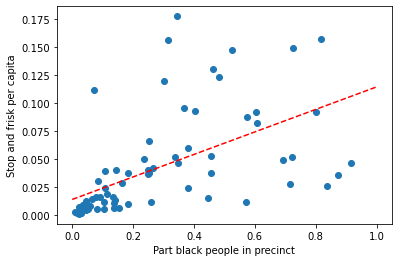

In [332]:
# 15. make PPP black population

# calculate
calcNeededPrecinct(black, stopsPerCapitaBlack, "black_prop")
# plot
plotLinearRegr(black, stopsPerCapitaBlack, "black")

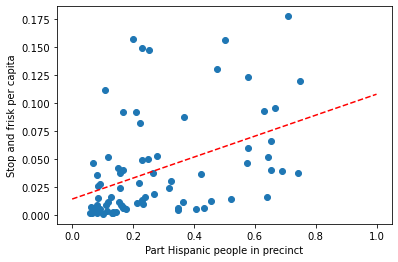

In [333]:
# 16. make PPP Hispanic population

# calculate
calcNeededPrecinct(hispanic, stopsPerCapitaHispanic, "hispanic_prop")
# plot
plotLinearRegr(hispanic, stopsPerCapitaHispanic, "Hispanic")

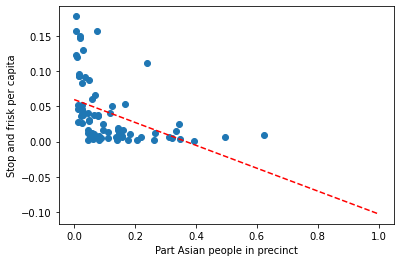

In [334]:
# 17. make PPP Asian population

# calculate
calcNeededPrecinct(asian, stopsPerCapitaAsian, "asian_prop")
# plot
plotLinearRegr(asian, stopsPerCapitaAsian, "Asian")

# 📝 Summarizing conclusions

In precincts with a higher population of the ethnicities white and Asian, it mostly correlates with low stop and frisks per capita. On the contrary, the precincts with more black and Hispanic populations have a high stop and frisk rate. Also, because we used the stop and frisk per capita instead of the individual groups, the groups can influence the rates. However, looking at the initial data sample in part 2, this is unlikely. Finally, the Asian population shows a negative regression line after 60%. This can be because there are relatively few precincts with a high percentage Asian population


## Part 4
#### Read http://www.stat.columbia.edu/~gelman/research/published/frisk9.pdf. Summarize the argument it is responding to, and the counterargument it makes. (10 points)

# 📝  Summarize arguments and counterarguments of article


The publication responds to the argument that the police are more often stopping certain ethnicities because they occur more frequently in criminal activities. This can be because some social regions have higher crime rates and people living there are more likely to be subject to higher-stop rates. Therefore the initial arguments state that this can be seen in the data. The essay looks over the facts to see if the claims are valid or not.

 First, the authors look into a dataset of 175,000 of the stops starting in  January 1998 to March 1999. An observation they see is that the black and Hispanic people are highly overrepresented in the data in comparison to their fraction of the total population after they take arrests data to consider criminal activities by these ethnic groups. 

After the authors look at police data per precinct, to see if the case if the police stop more people in areas with higher crime rates, but treating the ethnicities more equally. A Poisson model is built with the previous year of arrest as a starting point to find the answer. The results indicate that black and Hispanic people are stopped more often with violent crimes and weapon crimes, which are 69% of the stops. The distribution of the population of the precinct did not impact these results. Eventually, taking both the model and the mapped data, the authors disapprove of the initial argument the article was responding to.
